In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Data Generation Functions
Functions that generate 1D datapoints for each of n different guassian distributions. 

For the first generator function, each guassian has its center chosen randomly within the range -10 to 10 and has a standard deviation of 1. x datapoints are randomly sampled from n random guassians. The function returns a list of all datapoints it generated across all guassians and a list of all centers the datapoints were generated from.

For the second generator function, x datapoints are sampled from each of n guassians whose centers are provided by the user. The function returns a list of all datapoints it generated across all guassians and the list of all centers the datapoints were generated from.

In [73]:
def generate_random_data(n, x):
    data = []
    centers = []
    for i in range(n):
        center = np.random.uniform(-10, 10)
        centers.append(center)
        data = data + np.random.normal(center, 1, x).tolist()
    return data, centers

def generate_data(centers, x, stdv=1):
    data = []
    for m in centers:
        data = data + np.random.normal(m, stdv, x).tolist()
    return data, centers

### Soft K-Means Implementation

The soft_f_means function runs the soft k-means algorithm on a 1-dimensional dataset provided to it. k is the number of clusters the alogirthm will attempt to find as specified by the caller. theta is the maximum amount any cluster could have moved in an iteration when testing whether the algorithm has converged on a solution. c is the aneeling rate, 0 < c < 1.

In [68]:
def soft_k_means(data, theta, c, k, verbose=True):
    MAX_ITER = 50
    n, k, s, centers, p_matrix = initialize(data, k)
    sigma = 0.1
    alpha = 0.5
    iteration = 1
    if verbose:
        print('INITIAL STATE:')
        print('n: ', str(n))
        print('k: ', str(k))
        print('s: ', str(s))
        print('centers: ', str(centers))
    #print('p_matrix: ', str(p_matrix))
    
    while(iteration < MAX_ITER):
        #print()
        #print('ITERATION ' + str(iteration))
        #print('CALL: calc_assignments')
        p_matrix = calc_assignments(data, centers, p_matrix, s)
        #print('CALL: calc_clust_centers')
        centers_old = centers
        centers = calc_clust_centers(data, p_matrix)
        if(check_convergence(centers, centers_old, theta)):
            if(check_deterministic(p_matrix)):
               break
            s = s * c
            #print('CONVERGED')
            #print('new s: ', s)
        iteration += 1      

    if verbose:
        print('END OF SOFT K MEANS')
        print('centers: ', centers)
        print('k: ', k)
        print('Finished in ', iteration, ' iterations')
    #print('p_matrix: ', p_matrix)
    return centers, k, iteration

def initialize(data, k):
    n = len(data)
    s = 100000
    centers = []
    for i in range(k):
        centers.append(np.mean(data)*np.random.normal(0, 0.1))
    p_matrix = []
    for i in range(n):
        p_matrix.append([])
        for j in range(k):
            p_matrix[i].append(1/k)
    return n, k, s, centers, p_matrix

def calc_assignments(data, centers, p_matrix, s):
    new_p_matrix = np.zeros((len(data), len(centers))).tolist()
    for i, X in enumerate(data):
        for j, X_c_star in enumerate(centers):
            sum = 0
            for k, X_c in enumerate(centers):
                if k != j:
                    temp = np.exp(-(1/s) * (d_func(X, X_c) - d_func(X, X_c_star)))
                    temp = temp * p_of_c(k, p_matrix)
                    temp = temp / p_of_c(j, p_matrix)
                    sum += temp                    
            new_p_matrix[i][j] = (1 + sum) ** -1
    #print('new p_matrix: ', new_p_matrix)
    return new_p_matrix

def p_of_c(c, p_matrix):
    rtn = 0
    for i, p_c_given_x in enumerate(p_matrix):
        rtn += p_c_given_x[c]
    rtn = rtn / len(p_matrix)
    return rtn

def d_func(X, X_c):
    return ((X - X_c) ** 2) * 0.5

def calc_clust_centers(data, p_matrix):
    rtn = []
    for c in range(len(p_matrix[0])):
        num = 0
        for x in range(len(data)):
            num += p_matrix[x][c] * data[x]
        den = 0
        for x in range(len(data)):
            den += p_matrix[x][c]
        X_c = num / den
        rtn.append(X_c)
    #print(rtn)
    return rtn

def check_convergence(centers, centers_old, theta):
    rtn = True
    for c in zip(centers, centers_old):
        if d_func(c[0], c[1]) > theta:
            rtn = False
    return rtn

def check_deterministic(p_matrix):
    rtn = True
    for x in p_matrix:
        if np.max(x) < 1:
            rtn = False
    return rtn

### Plotting Function
Simple function for plotting the 1D data used by this soft k-means implementation and any centers found or generated from.

In [10]:
def plot_1_D(data, centers, title=''):
    plt.figure(figsize=(20,1))
    plt.scatter(data, np.zeros(len(data)), s=25)
    plt.scatter(centers, np.zeros(len(centers)), s=100, facecolors='r', edgecolors='b')
    plt.title(title)
    plt.yticks([])
    plt.xticks([-15, -10, -5, 0, 5, 10,15])
    plt.show()

### Sample Run of the Soft K-Means Algorithm

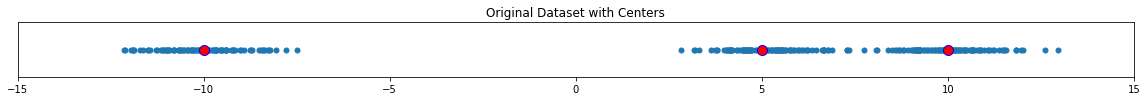

INITIAL STATE:
n:  300
k:  3
s:  100000
centers:  [-0.04783737533469255, -0.1001267685582906, 0.11767124465400948]


c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in double_scalars


END OF SOFT K MEANS
centers:  [5.143623407311601, -10.049386565118228, 10.045322262903348]
k:  3
Finished in  14  iterations


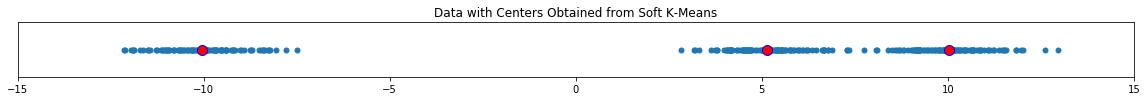

In [81]:
data, centers = generate_data([-10, 5, 10], 100)
plot_1_D(data, centers, 'Original Dataset with Centers')
centroids, k, iter = soft_k_means(data, theta=0.01, c=0.1, k=3)
plot_1_D(data, centroids, 'Data with Centers Obtained from Soft K-Means')

### Time to Completion vs. Dataset Size

Processing for 5 data points
Processing for 10 data points


c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp


Processing for 15 data points
Processing for 20 data points
Processing for 25 data points
Processing for 35 data points
Processing for 50 data points
Processing for 75 data points
Processing for 100 data points


c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in double_scalars


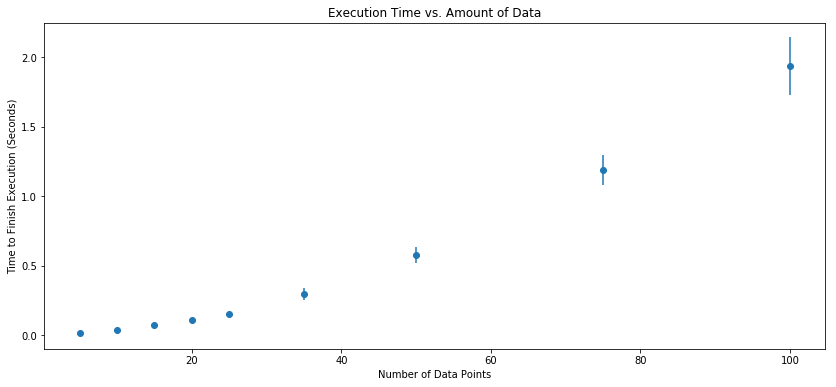

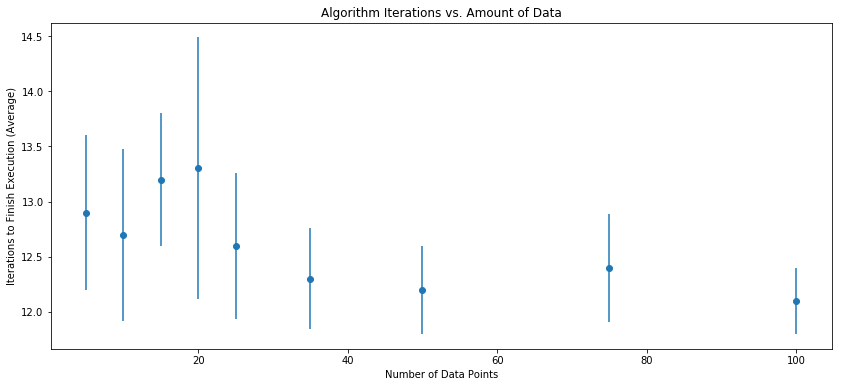

In [80]:
times = []
iters = []
index = 0
n_vals = [5, 10, 15, 20, 25, 35, 50, 75, 100 ]
for n in n_vals: #75, 100, 200, 300
    print('Processing for', n, 'data points')
    times.append([])
    iters.append([])
    for i in range(10):
        start_time = time.time()
        data, _ = generate_data([-5, 0, 5], n)
        _, _, iterations = soft_k_means(data, theta=0.01, c=0.1, k=3, verbose=False)
        time_elapsed = time.time() - start_time
        times[index].append(time_elapsed)
        iters[index].append(iterations)
    index += 1
plt.figure(figsize=(14,6))
plt.errorbar(n_vals, np.mean(times, axis=1), yerr=np.std(times, axis=1), linestyle="None", fmt='--o')
plt.xlabel('Number of Data Points')
plt.ylabel('Time to Finish Execution (Seconds)')
plt.title('Execution Time vs. Amount of Data')
plt.show()
plt.figure(figsize=(14,6))
plt.errorbar(n_vals, np.mean(iters, axis=1), yerr=np.std(iters, axis=1), linestyle="None", fmt='--o')
plt.xlabel('Number of Data Points')
plt.ylabel('Iterations to Finish Execution (Average)')
plt.title('Algorithm Iterations vs. Amount of Data')
plt.show()

### Time to Completion vs. Underlying Data "Distinctness"

1


c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp


2
3


c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in double_scalars


4
5
10
15
20
25
30


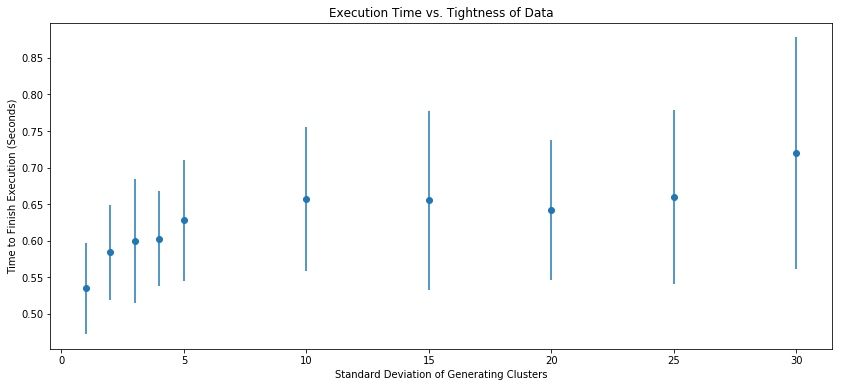

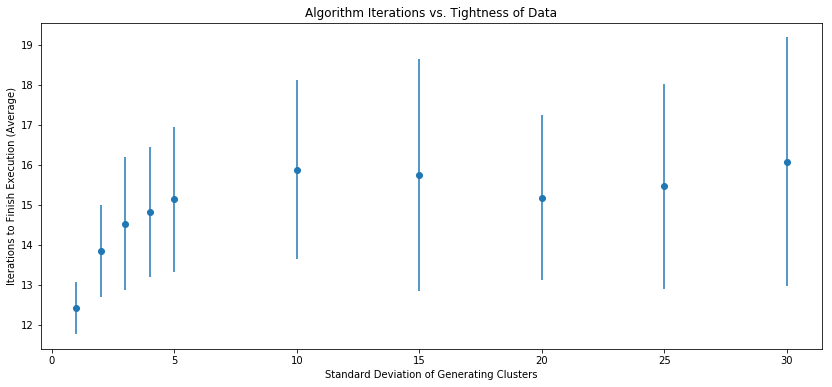

In [79]:
times = []
iters = []
index = 0
stdv_vals = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
for s in stdv_vals: 
    print('Processing for data with standard deviation', s)
    times.append([])
    iters.append([])
    for i in range(100):
        start_time = time.time()
        data, _ = generate_data([-5, 0, 5], 50, stdv=s)
        _, _, iterations = soft_k_means(data, theta=0.01, c=0.1, k=3, verbose=False)
        time_elapsed = time.time() - start_time
        times[index].append(time_elapsed)
        iters[index].append(iterations)
    index += 1
plt.figure(figsize=(14,6))
plt.errorbar(stdv_vals, np.mean(times, axis=1), yerr=np.std(times, axis=1), linestyle="None", fmt='--o')
plt.xlabel('Standard Deviation of Generating Clusters')
plt.ylabel('Time to Finish Execution (Seconds)')
plt.title('Execution Time vs. Tightness of Data')
plt.show()
plt.figure(figsize=(14,6))
plt.errorbar(stdv_vals, np.mean(iters, axis=1), yerr=np.std(iters, axis=1), linestyle="None", fmt='--o')
plt.xlabel('Standard Deviation of Generating Clusters')
plt.ylabel('Iterations to Finish Execution (Average)')
plt.title('Algorithm Iterations vs. Tightness of Data')
plt.show()